   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country salary  
0          2174             0              40  United-States  <=50K  
1             0             0             

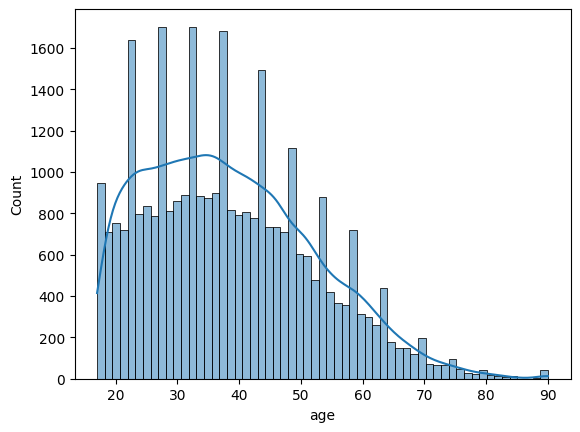

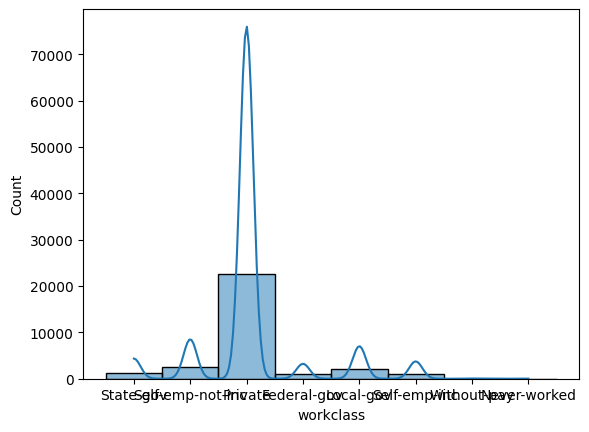

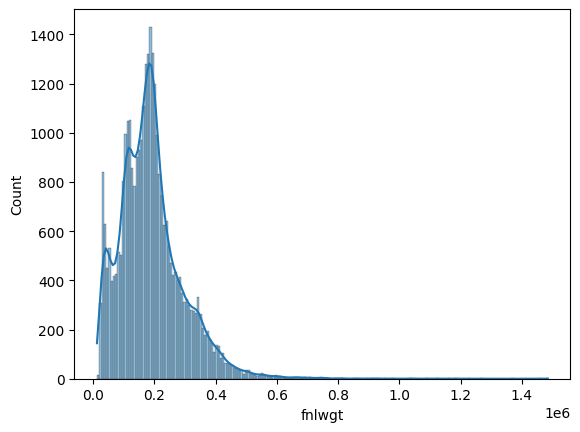

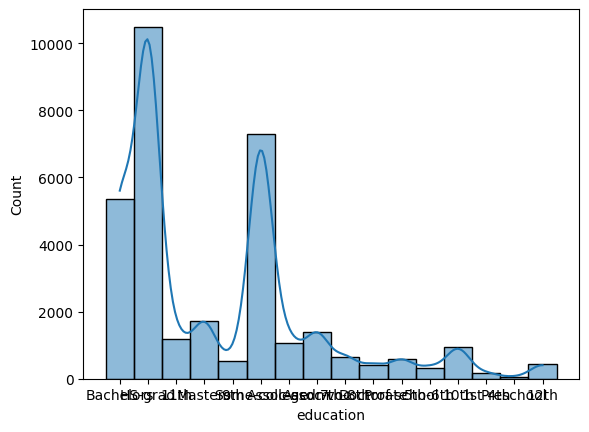

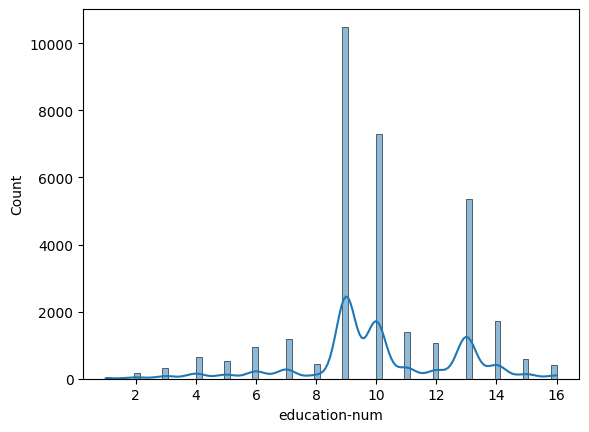

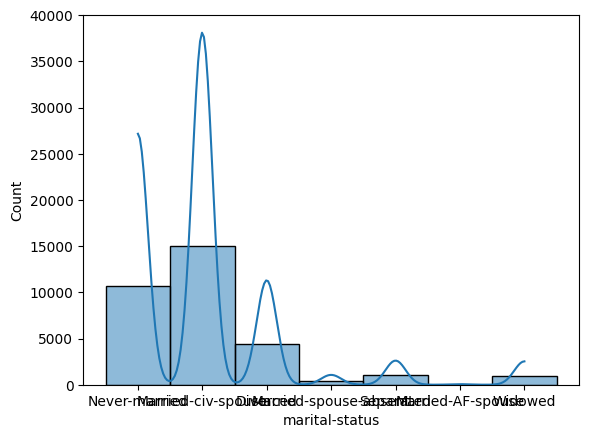

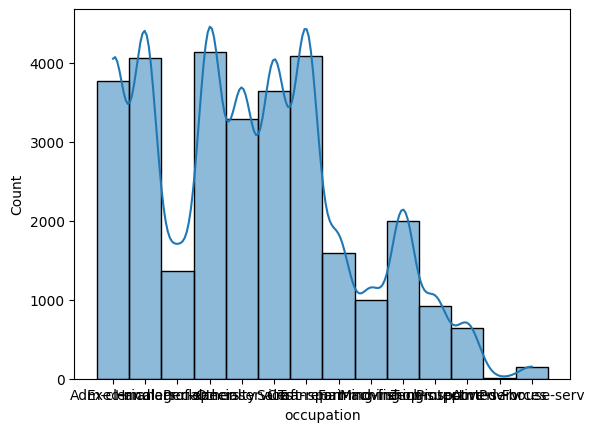

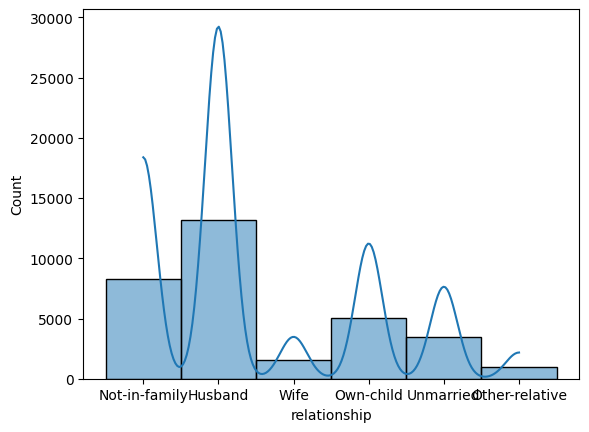

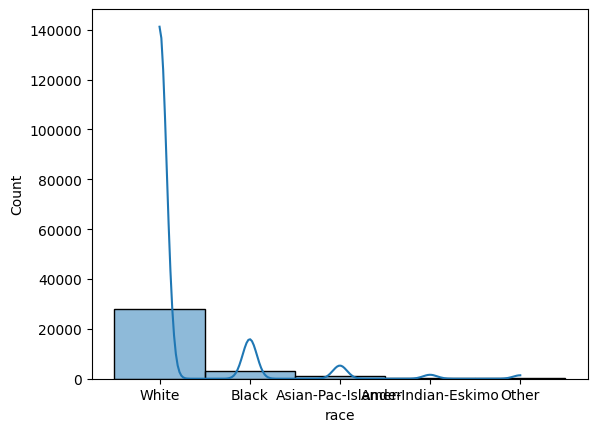

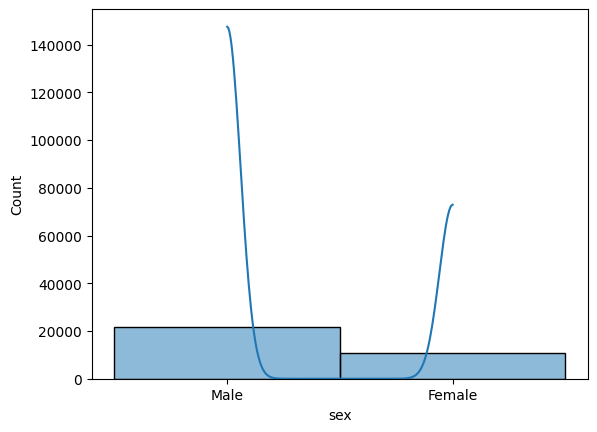

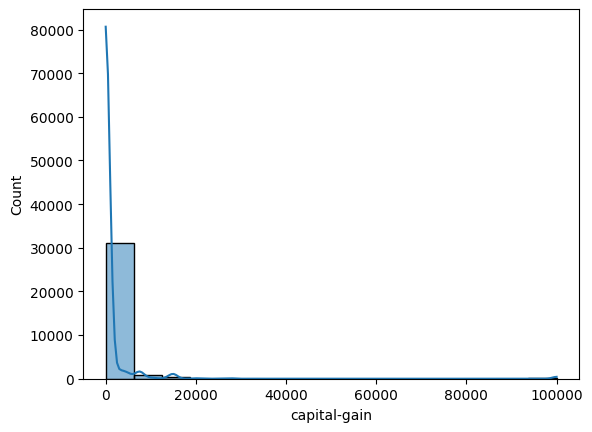

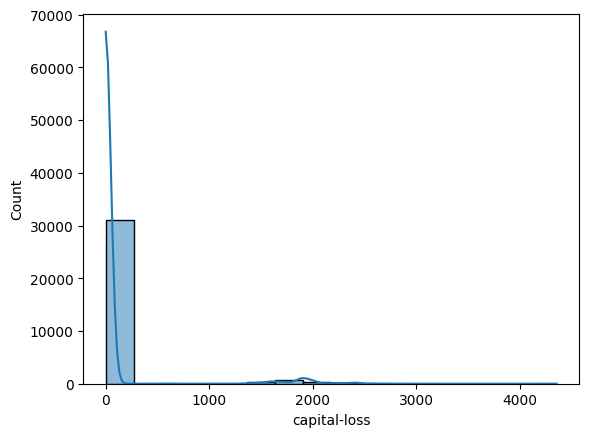

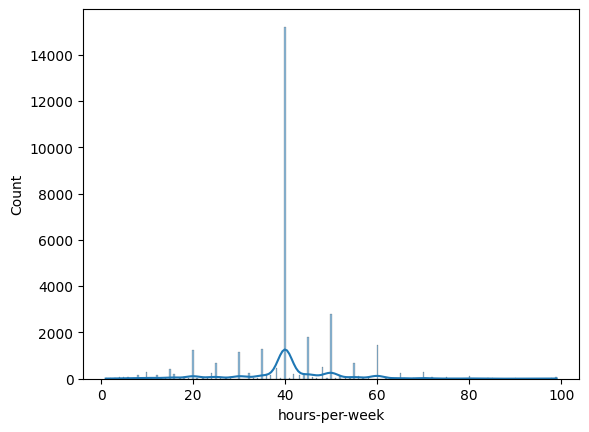

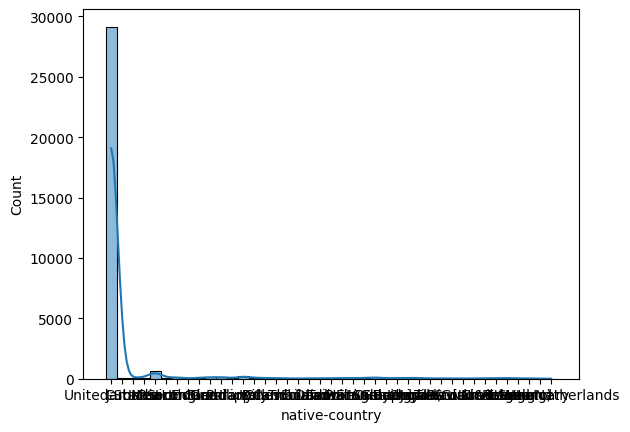

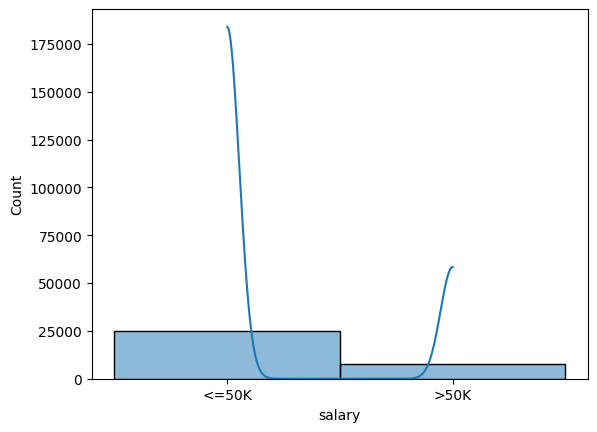

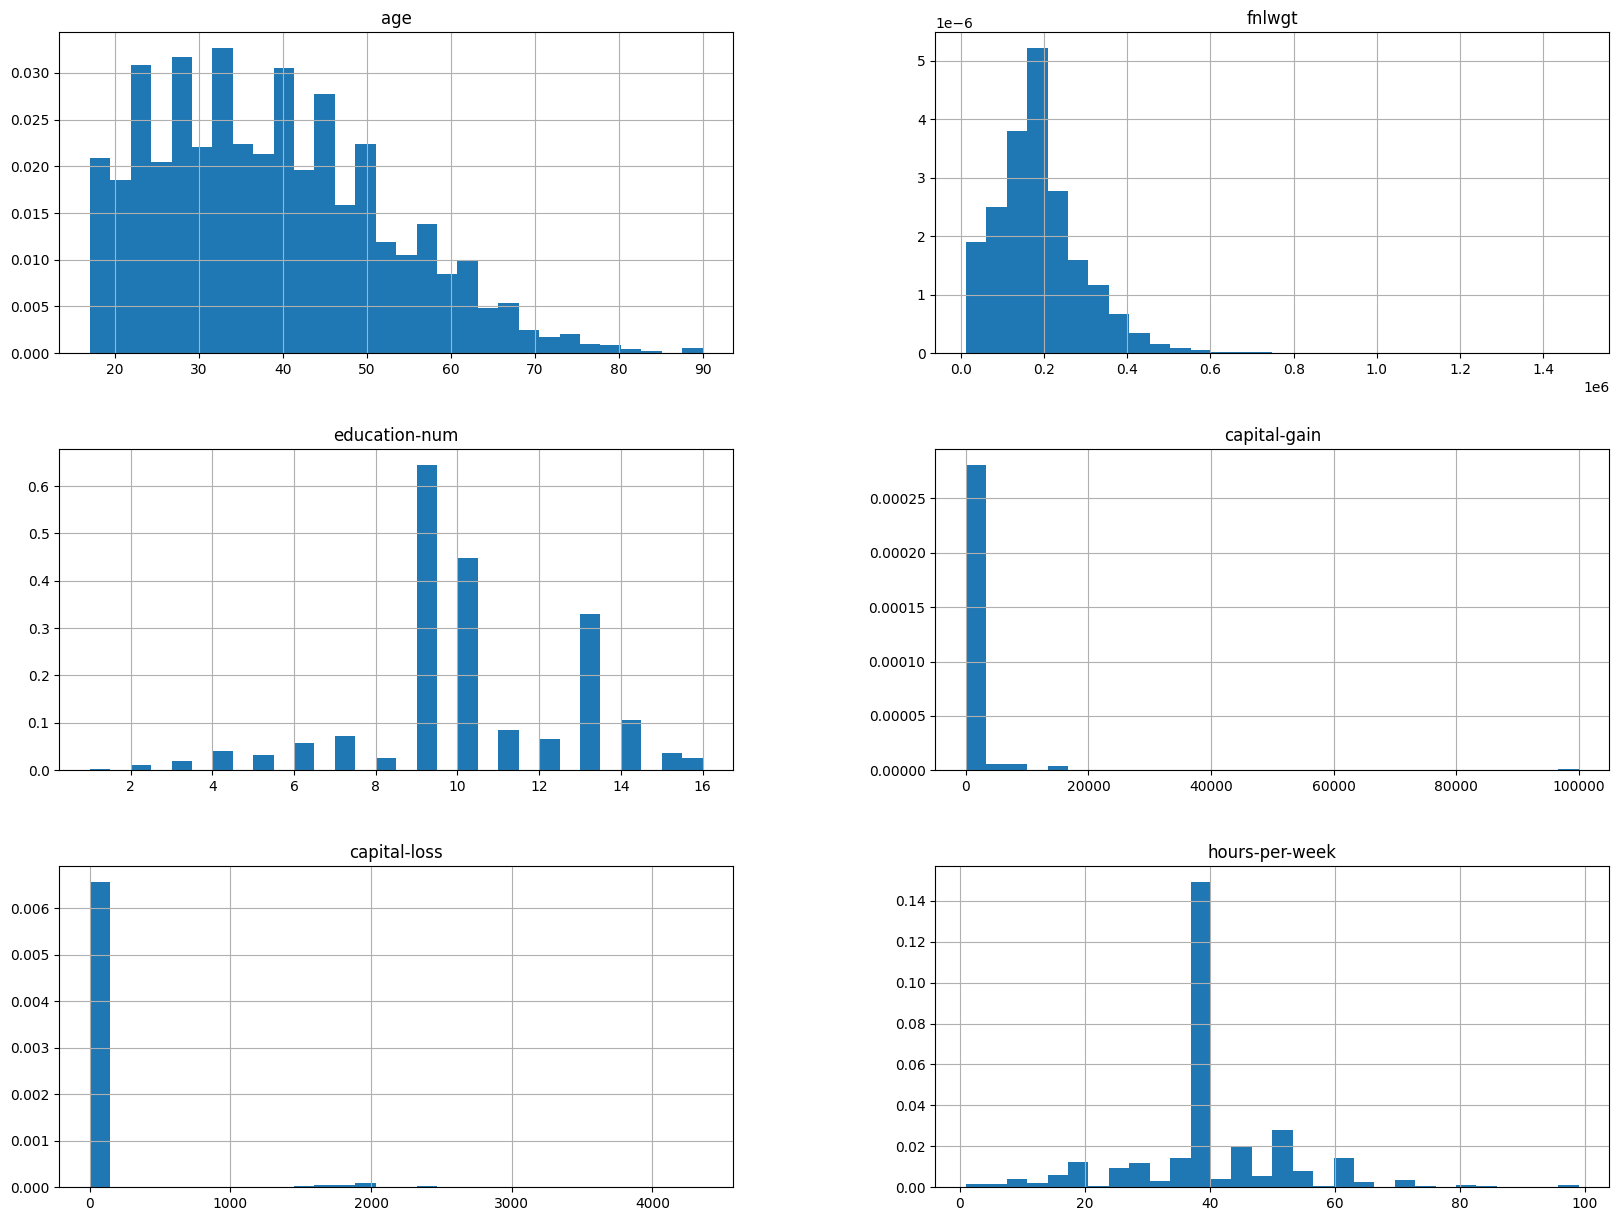

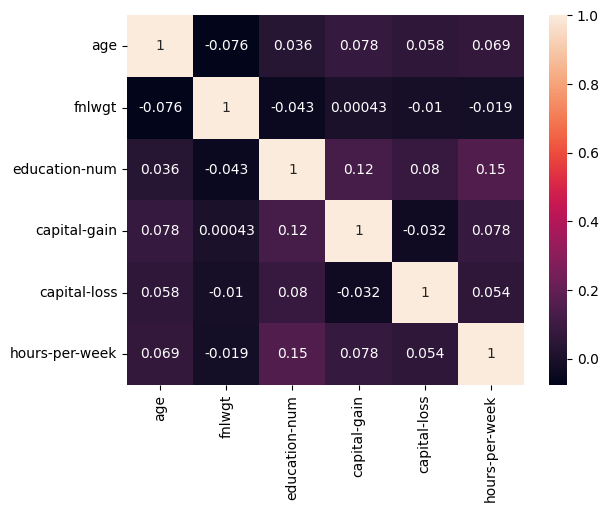

In [1]:
# 1. Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# 2. Load the Data
df = pd.read_csv('adult_income.csv')

# Replace ? with NaN
df.replace('?', np.nan, inplace=True)

# 3. Inspect the Data
print(df.head())
print(df.info())
print(df.describe())

# 4. Check for Missing Values
print(df.isnull().sum())

# 5. Handle Missing Values
numeric_columns = df.select_dtypes(include=[np.number]).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# 6. Check for Duplicate Values
print(df.duplicated().sum())

# 7. Remove Duplicate Values
df.drop_duplicates(inplace=True)

# 8. Visualize the Data
for column in df.columns:
    sns.histplot(df[column], kde=True)
    plt.show()

# 9. Check Data Distribution
df.hist(bins=30, figsize=(20,15), density=True)
plt.show()

# 10. Check Correlations
sns.heatmap(df[numeric_columns].corr(), annot=True)
plt.show()

# 11. Handle Categorical Variables
df = pd.get_dummies(df, drop_first=True)

# 12. Outlier Detection
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

# 13. Feature Scaling
scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
